In [1]:
import tensorflow as tf
import tensorflow.keras as keras
tf.__version__, keras.__version__

('2.3.2', '2.4.0')

In [2]:
# 0. 사용할 패키지 불러오기
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import os

In [3]:
# 1. 데이터셋 생성하기
data = pd.read_csv('./dataset/iris.csv', header=None)
print(data.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [4]:
X = data.iloc[:, 0:4]
y = data.iloc[:, 4]

print(set(y))

{'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'}


In [5]:
# 원핫 인코딩으로 바꿔준다

e = LabelEncoder()
e.fit(y)
y = e.transform(y)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

(120, 4)
(120, 3)


In [6]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:

model_dir = './model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_filepath = model_dir + 'iris.h5'
checkpointer = ModelCheckpoint(filepath=model_filepath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습의 자동중단! 5번동안 나아지지 않으면 stop!
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [9]:
# 4. 모델 학습시키기
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=10, callbacks=[checkpointer, early_stop])

Epoch 1/200
 1/12 [=>............................] - ETA: 0s - loss: 2.0462 - accuracy: 0.4000
Epoch 00001: val_loss improved from inf to 1.76458, saving model to ./model\iris.h5
12/12 [==============================] - 0s 36ms/step - loss: 1.8066 - accuracy: 0.3500 - val_loss: 1.7646 - val_accuracy: 0.2667
Epoch 2/200
 1/12 [=>............................] - ETA: 0s - loss: 1.9623 - accuracy: 0.4000
Epoch 00002: val_loss improved from 1.76458 to 1.52065, saving model to ./model\iris.h5
12/12 [==============================] - 0s 10ms/step - loss: 1.5584 - accuracy: 0.3500 - val_loss: 1.5207 - val_accuracy: 0.2667
Epoch 3/200
 1/12 [=>............................] - ETA: 0s - loss: 1.5230 - accuracy: 0.2000
Epoch 00003: val_loss improved from 1.52065 to 1.34852, saving model to ./model\iris.h5
12/12 [==============================] - 0s 8ms/step - loss: 1.3516 - accuracy: 0.3500 - val_loss: 1.3485 - val_accuracy: 0.2667
Epoch 4/200
12/12 [==============================] - ETA: 0s - los

 1/12 [=>............................] - ETA: 0s - loss: 0.4513 - accuracy: 1.0000
Epoch 00027: val_loss improved from 0.47866 to 0.46134, saving model to ./model\iris.h5
12/12 [==============================] - 0s 9ms/step - loss: 0.4190 - accuracy: 0.9500 - val_loss: 0.4613 - val_accuracy: 0.9333
Epoch 28/200
 1/12 [=>............................] - ETA: 0s - loss: 0.4032 - accuracy: 0.9000
Epoch 00028: val_loss improved from 0.46134 to 0.43885, saving model to ./model\iris.h5
12/12 [==============================] - 0s 9ms/step - loss: 0.4010 - accuracy: 0.9750 - val_loss: 0.4389 - val_accuracy: 0.9333
Epoch 29/200
 1/12 [=>............................] - ETA: 0s - loss: 0.2842 - accuracy: 1.0000
Epoch 00029: val_loss improved from 0.43885 to 0.41966, saving model to ./model\iris.h5
12/12 [==============================] - 0s 8ms/step - loss: 0.3845 - accuracy: 0.9667 - val_loss: 0.4197 - val_accuracy: 0.9000
Epoch 30/200
 1/12 [=>............................] - ETA: 0s - loss: 0.49

 1/12 [=>............................] - ETA: 0s - loss: 0.1744 - accuracy: 1.0000
Epoch 00053: val_loss improved from 0.18538 to 0.17923, saving model to ./model\iris.h5
12/12 [==============================] - 0s 10ms/step - loss: 0.1573 - accuracy: 0.9750 - val_loss: 0.1792 - val_accuracy: 0.9667
Epoch 54/200
 1/12 [=>............................] - ETA: 0s - loss: 0.2023 - accuracy: 1.0000
Epoch 00054: val_loss improved from 0.17923 to 0.17401, saving model to ./model\iris.h5
12/12 [==============================] - 0s 9ms/step - loss: 0.1529 - accuracy: 0.9917 - val_loss: 0.1740 - val_accuracy: 0.9667
Epoch 55/200
 1/12 [=>............................] - ETA: 0s - loss: 0.1767 - accuracy: 1.0000
Epoch 00055: val_loss improved from 0.17401 to 0.16946, saving model to ./model\iris.h5
12/12 [==============================] - 0s 9ms/step - loss: 0.1520 - accuracy: 0.9833 - val_loss: 0.1695 - val_accuracy: 0.9667
Epoch 56/200
 1/12 [=>............................] - ETA: 0s - loss: 0.1

Epoch 80/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0584 - accuracy: 1.0000
Epoch 00080: val_loss improved from 0.11208 to 0.11080, saving model to ./model\iris.h5
12/12 [==============================] - 0s 7ms/step - loss: 0.1030 - accuracy: 0.9750 - val_loss: 0.1108 - val_accuracy: 0.9667
Epoch 81/200
 1/12 [=>............................] - ETA: 0s - loss: 0.1044 - accuracy: 1.0000
Epoch 00081: val_loss did not improve from 0.11080
12/12 [==============================] - 0s 7ms/step - loss: 0.1037 - accuracy: 0.9750 - val_loss: 0.1120 - val_accuracy: 0.9667
Epoch 82/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0454 - accuracy: 1.0000
Epoch 00082: val_loss improved from 0.11080 to 0.10752, saving model to ./model\iris.h5
12/12 [==============================] - 0s 9ms/step - loss: 0.0958 - accuracy: 0.9833 - val_loss: 0.1075 - val_accuracy: 0.9667
Epoch 83/200
 1/12 [=>............................] - ETA: 0s - loss: 0.2474 - accuracy: 0.9000
Ep

 1/12 [=>............................] - ETA: 0s - loss: 0.0691 - accuracy: 1.0000
Epoch 00107: val_loss improved from 0.08702 to 0.08644, saving model to ./model\iris.h5
12/12 [==============================] - 0s 10ms/step - loss: 0.0875 - accuracy: 0.9917 - val_loss: 0.0864 - val_accuracy: 0.9667
Epoch 108/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0485 - accuracy: 1.0000
Epoch 00108: val_loss did not improve from 0.08644
12/12 [==============================] - 0s 7ms/step - loss: 0.0827 - accuracy: 0.9833 - val_loss: 0.0872 - val_accuracy: 0.9667
Epoch 109/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0434 - accuracy: 1.0000
Epoch 00109: val_loss improved from 0.08644 to 0.08536, saving model to ./model\iris.h5
12/12 [==============================] - 0s 9ms/step - loss: 0.0814 - accuracy: 0.9833 - val_loss: 0.0854 - val_accuracy: 0.9667
Epoch 110/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0164 - accuracy: 1.0000
Epoch 00110

Epoch 135/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 00135: val_loss improved from 0.07552 to 0.07464, saving model to ./model\iris.h5
12/12 [==============================] - 0s 8ms/step - loss: 0.0757 - accuracy: 0.9833 - val_loss: 0.0746 - val_accuracy: 0.9667
Epoch 136/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0321 - accuracy: 1.0000
Epoch 00136: val_loss did not improve from 0.07464
12/12 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9833 - val_loss: 0.0751 - val_accuracy: 0.9667
Epoch 137/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0550 - accuracy: 1.0000
Epoch 00137: val_loss improved from 0.07464 to 0.07395, saving model to ./model\iris.h5
12/12 [==============================] - 0s 9ms/step - loss: 0.0795 - accuracy: 0.9833 - val_loss: 0.0739 - val_accuracy: 0.9667
Epoch 138/200
 1/12 [=>............................] - ETA: 0s - loss: 0.1804 - accuracy: 0.900

Epoch 163/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0386 - accuracy: 1.0000
Epoch 00163: val_loss improved from 0.06806 to 0.06724, saving model to ./model\iris.h5
12/12 [==============================] - 0s 9ms/step - loss: 0.0709 - accuracy: 0.9833 - val_loss: 0.0672 - val_accuracy: 0.9667
Epoch 164/200
 1/12 [=>............................] - ETA: 0s - loss: 0.1158 - accuracy: 1.0000
Epoch 00164: val_loss improved from 0.06724 to 0.06693, saving model to ./model\iris.h5
12/12 [==============================] - 0s 8ms/step - loss: 0.0690 - accuracy: 0.9917 - val_loss: 0.0669 - val_accuracy: 0.9667
Epoch 165/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0675 - accuracy: 1.0000
Epoch 00165: val_loss did not improve from 0.06693
12/12 [==============================] - 0s 4ms/step - loss: 0.0710 - accuracy: 0.9833 - val_loss: 0.0670 - val_accuracy: 0.9667
Epoch 166/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0531 - accuracy: 1.000

Epoch 00190: val_loss improved from 0.06299 to 0.06240, saving model to ./model\iris.h5
12/12 [==============================] - 0s 9ms/step - loss: 0.0667 - accuracy: 0.9833 - val_loss: 0.0624 - val_accuracy: 0.9667
Epoch 191/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0091 - accuracy: 1.0000
Epoch 00191: val_loss did not improve from 0.06240
12/12 [==============================] - 0s 4ms/step - loss: 0.0664 - accuracy: 0.9833 - val_loss: 0.0626 - val_accuracy: 0.9667
Epoch 192/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0197 - accuracy: 1.0000
Epoch 00192: val_loss improved from 0.06240 to 0.06218, saving model to ./model\iris.h5
12/12 [==============================] - 0s 10ms/step - loss: 0.0664 - accuracy: 0.9833 - val_loss: 0.0622 - val_accuracy: 0.9667
Epoch 193/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0587 - accuracy: 1.0000
Epoch 00193: val_loss did not improve from 0.06218
12/12 [==============================] - 0s

In [10]:
# 6. 모델 평가하기
print("정확도 : %.2f " %(model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 4ms/step - loss: 0.0610 - accuracy: 0.9667
정확도 : 0.97 


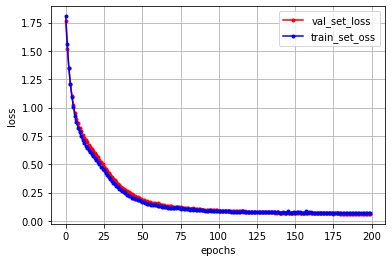

In [11]:
# 5. 학습과정 살펴보기
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

잘 학습되는 것을 볼 수 있다.